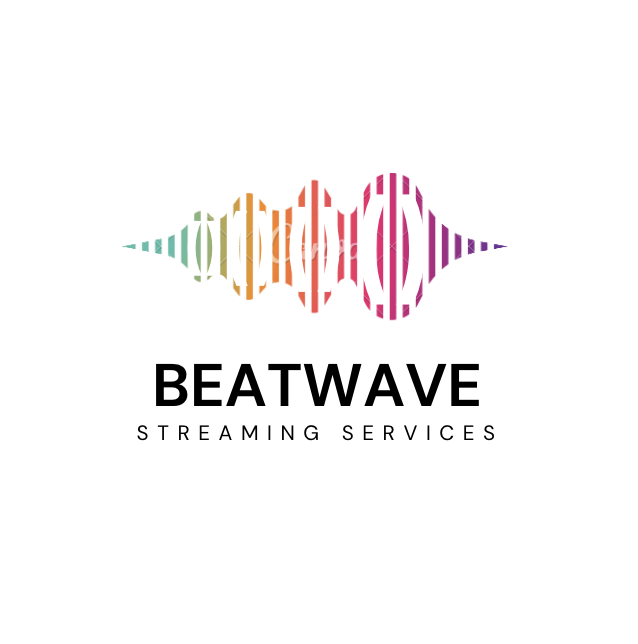

# Data Classification: Crafting BeatWave's Genre Tapestry

## Business Understanding

We are working for a fictional startup called 'BeatWave', an up-and-coming music streaming platform specializing in electronic music. Through the iterative process of data classification modeling, we can begin to sift through popular electronic songs and give BeatWave a better understanding of which sonic metrics predict which genres. This will allow for a streamlined approach to classifying titles into their appropriate categories.

## Data Understanding

Data source: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

We are using an open source dataset that displays sample data from popular streaming platform Spotify. Using this data will help us gauge our place in competition with the world's leading streaming service.

Let's begin by importing the necessary libraries and superficially inspecting the dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/genres.csv')

df.head()

<ipython-input-1-85ec021d79d1>:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/genres.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [2]:
df.shape

(42305, 22)

In [3]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [4]:
# Assessing the number of genres in our target variable
len(df['genre'].value_counts())

15

In [5]:
# Assessing the number of data points within each genre
df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [6]:
# Getting preliminary statistics on the entire dataset
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


At first glance, our DataFrame has 19 features and 42,305 datapoints. The data represents audio features of music tracks sourced from Spotify, along with additional metadata.

**Features of note:**

- **Instrumentalness:** Instrumentalness measures the presence of instrumental content in a track. Higher values suggest the track is primarily instrumental.

- **Tempo:** Tempo represents the beats per minute (BPM) of the track, indicating speed and rhythm.

- **Key:** The musical key of the track, represented as an integer value between 0 and 11, corresponding to different musical keys.

- **Duration MS:** : Duration in milliseconds represents the length of the track in milliseconds.

- **Danceability:** The "danceability" feature (ranging from 0 to 1) indicates how suitable a track is for dancing. Higher values suggest that the track is more danceable, likely characterized by a strong rhythm, beat, and tempo. 

- **Energy:** The "energy" feature (ranging from 0 to 1) represents the intensity and activity of a track. Tracks with high energy values are likely to be more fast-paced and lively, making them appealing for activities that require a high level of engagement and excitement.

- **Loudness:** The "loudness" feature (measured in decibels) indicates the overall volume of a track. Higher  values suggest that the track is relatively louder. This feature can play a role in determining the mood or atmosphere of the track, and it might be important for creating playlists with a consistent volume level or for selecting tracks that fit a particular ambiance.

***Other features include:*** liveness (measure of how likely the track was recorded live), acousticness (level of acoustic instrumentation present in the track), speechiness (detection of spoken words in track), mode (musical modality of the track -- major, minor, etc.), valence (overall positivity or negativity of the track), and time signature (number of beats per bar, which notes get one beat).

## Data Preparation

We will now begin to clean the data and prepare it for modeling:

In [7]:
# Getting sum of null values for each feature
df.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
# Dropping all features with null values
df = df.dropna(axis=1)

In [9]:
# Checking that null values were eliminated
df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64

Now, let's continue to sift through the data to find features that contain irrelevant, non-numeric data:

In [10]:
# Getting the column names containing strings
string_columns = df.select_dtypes(include=['object']).columns

# Printing the column names containing strings
print("Columns containing strings:")
print(string_columns)

Columns containing strings:
Index(['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre'], dtype='object')


In [11]:
# Dropping string features from the dataset 
columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url']
df = df.drop(columns=columns_to_drop)

df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')

With our dataset now fully clean and workable, we can now begin the iterative modeling process.

## Modeling

Now we get to work through a series of models that could potentially benefit BeatWave in its ability to classify songs based on genre.

### Model 1: Decision Tree

Decision trees are tree-like models where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents the predicted outcome or class label. Decision trees are particularly useful for tasks like genre classification of music due to their intuitive nature and ability to handle complex decision boundaries.

A decision tree algorithm recursively partitions the feature space by selecting the most informative features at each internal node. It makes decisions based on a set of rules derived from the training data. These rules are learned during the training process, which involves finding the best splitting points that maximize the separation between different classes.

First, we import the necessary libraries, define X and y, and split the data into training and test sets using the train_test_split function.

In [12]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Dividing the dataset into features (X) and the target variable (y).
X = df.drop(['genre'], axis=1)  
y = df['genre']

# Further splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now, let's check the class distribution of y_train using value_counts(). This provides insights into the imbalance among classes. 

In [14]:
# Examining and printing class distributions. 
class_distribution = y_train.value_counts()
print(class_distribution)

Underground Rap    4683
Dark Trap          3608
trance             2437
Hiphop             2407
techhouse          2407
trap               2405
dnb                2367
techno             2366
psytrance          2363
hardstyle          2317
RnB                1703
Trap Metal         1572
Rap                1507
Emo                1339
Pop                 363
Name: genre, dtype: int64


Now, we will calculate class weights. By using class weights, the model's training process will assign higher weights to underrepresented classes and lower weights to overrepresented classes, addressing the imbalance and potentially leading to improved classification performance.

We will create a class_weights dictionary using a dictionary comprehension. For each class label (key) and its corresponding count (value) in class_distribution, the code calculates the inverse of the count. This forms a weight that reflects the rarity of the class: rarer classes will have higher weights.
The calculated class weights are printed to provide insight into the resulting weights.

In [15]:
# Calculating class weights as inversely proportional to class frequencies. 
class_weights = {label: 1.0 / count for label, count in class_distribution.items()}
print(class_weights)

{'Underground Rap': 0.00021353833013025838, 'Dark Trap': 0.0002771618625277162, 'trance': 0.0004103405826836274, 'Hiphop': 0.0004154549231408392, 'techhouse': 0.0004154549231408392, 'trap': 0.0004158004158004158, 'dnb': 0.0004224757076468103, 'techno': 0.00042265426880811494, 'psytrance': 0.00042319085907744394, 'hardstyle': 0.00043159257660768235, 'RnB': 0.0005871990604815032, 'Trap Metal': 0.0006361323155216285, 'Rap': 0.0006635700066357001, 'Emo': 0.0007468259895444362, 'Pop': 0.0027548209366391185}


Now, we'll create a DecisionTreeClassifier instance named model. By providing the class_weight parameter, we ensure that the model assigns higher importance to the minority classes based on the calculated class weights. The random_state parameter helps ensure reproducibility of results.

The model is then fitted to the training data (X_train and y_train) using the fit method. This step trains the model to learn patterns and relationships between features and labels, considering the class weights.

After training, the model is used to predict the labels for the testing data (X_test). The predicted labels are stored in the y_pred variable.

By incorporating class weights into the training process, we aim to mitigate the impact of class imbalance and encourage the model to make better predictions, especially for the minority classes.

In [16]:
# Creating a Decision Tree classifier with the calculated class weights. 
model = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Fitting the model to the training data.
model.fit(X_train, y_train)

# Making predictions on the testing data (X_test). 
y_pred = model.predict(X_test)

Now we can calculate and display the accuracy of the initial decision tree model's predictions on the testing data. Accuracy is a common metric used to measure the model's performance by determining the proportion of correctly predicted instances among all instances in the dataset. A higher accuracy indicates better predictive performance, while a lower accuracy suggests room for improvement.

The accuracy_score function from the sklearn.metrics module is used to calculate the accuracy of the model's predictions. The function takes two arguments: the true labels (y_test) and the predicted labels (y_pred) for the testing data. The calculated accuracy is stored in the accuracy variable. We can then print accuracy of the initial model on the testing data. This provides insight into the model's overall performance in terms of correctly predicting the labels:

In [17]:
# Calculating accuracy of the initial model's predictions.
accuracy = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", accuracy)

Initial Model Accuracy: 0.5722727809951542


Not bad! We scored over 50% in initial model accuracy. However, it's possible that accuracy alone may not provide a comprehensive evaluation of the model's performance, especially if the dataset is imbalanced or if different classes have varying importance.

#### Class Distribution and Weights

We might want to consider other evaluation metrics like precision, recall & F1-score to gain a more complete understanding of the model's performance. First, let's check the class distributions to see whether we want to use macro or micro averaging in our performance metrics.

First, we'll create a new DataFrame named class_distribution_df. This DataFrame contains a single column labeled 'genre', which holds the target variable values (i.e., genres) from the training data.

The value_counts() method is then applied to the 'genre' column of the DataFrame. This method calculates and returns the count of occurrences for each unique genre in the dataset. The resulting counts are stored in the class_counts variable.

In [18]:
# Creating a DataFrame with target values
class_distribution_df = pd.DataFrame({'genre': y_train})

# Counting the occurrences of each genre in the DataFrame.
class_counts = class_distribution_df['genre'].value_counts()

Next, we'll calculate the class proportions by dividing each class count (stored in class_counts) by the total number of instances in the training set (len(y_train)). This yields the proportion of instances that belong to each class relative to the entire training dataset.

The imbalance ratio is then calculated by finding the ratio of the highest class count to the lowest class count. This ratio provides an understanding of the degree of imbalance between the most frequent and least frequent classes in the dataset.

Finally, we'll print our resulting DataFrames.


In [19]:
# Getting class counts and proportions
class_proportions = class_counts / len(y_train)

# Calculating imbalance ratio as the ratio of the highest class count to the lowest class count
imbalance_ratio = class_counts.max() / class_counts.min()

In [20]:
# Printing the class counts, proportions, and imbalance ratio
print("Class Counts:")
print(class_counts)

print("\nClass Proportions:")
print(class_proportions)

print("\nImbalance Ratio:")
print(imbalance_ratio)

Class Counts:
Underground Rap    4683
Dark Trap          3608
trance             2437
Hiphop             2407
techhouse          2407
trap               2405
dnb                2367
techno             2366
psytrance          2363
hardstyle          2317
RnB                1703
Trap Metal         1572
Rap                1507
Emo                1339
Pop                 363
Name: genre, dtype: int64

Class Proportions:
Underground Rap    0.138370
Dark Trap          0.106607
trance             0.072007
Hiphop             0.071120
techhouse          0.071120
trap               0.071061
dnb                0.069939
techno             0.069909
psytrance          0.069820
hardstyle          0.068461
RnB                0.050319
Trap Metal         0.046448
Rap                0.044528
Emo                0.039564
Pop                0.010726
Name: genre, dtype: float64

Imbalance Ratio:
12.900826446280991


**Class Counts:**

As previously stated, class counts indicate the number of samples available for each genre in our dataset.
Some genres have a substantial number of samples, such as "Underground Rap" (4683 samples) and "Dark Trap" (3608 samples).
On the other hand, genres like "Pop" have very few samples (363), making it a minority class.

**Class Proportions:**

Again, as we previously stated, class proportions represent the percentage of each genre's samples relative to the total number of samples in the dataset.
Genres like "Underground Rap" and "Dark Trap" account for a significant portion of the dataset (around 13.84% and 10.66% respectively).
"Pop" represents a very small proportion of the dataset (around 1.07%).

**Imbalance Ratio:**

As we know, imbalance ratio is the ratio between the count of samples in the majority class ("Underground Rap") and the count of samples in the minority class ("Pop").
In this case, the imbalance ratio is approximately 12.9, indicating a substantial class imbalance.

#### Precision, Recall & F1 Score Metrics

Given the high class imbalance in the dataset, ***using macro-averaging for precision, recall, and F1 score calculation is appropriate.*** Macro-averaging will give equal weight to each class, allowing us to evaluate the model's performance across all genres without bias towards the majority classes.

In [21]:
# Importing performance metrics
from sklearn.metrics import precision_score, recall_score, f1_score

We'll first use the precision_score function to compute precision scores for each class. The function takes y_test (true labels of the test set) and y_pred (predicted labels by the model) as inputs. By setting average=None, we calculate precision for each class separately, resulting in an array of precision scores.

Similarly, the recall_score function calculates recall (true positive rate) for each class. As with precision, it uses y_test and y_pred as inputs, and by setting average=None, we calculate recall scores for each class individually, creating an array of recall scores.

In [22]:
# Calculating precision
precision = precision_score(y_test, y_pred, average=None)

# Calculating recall
recall = recall_score(y_test, y_pred, average=None)

We then create a new pandas DataFrame named result_df to organize and store the calculated precision and recall scores. The 'Class' column is populated with class indices, ranging from 0 to the number of classes. The 'Precision' column is filled with the precision scores calculated earlier, and the 'Recall' column is filled with the recall scores.

In [23]:
# Creating a new DataFrame to store the results
result_df = pd.DataFrame({
    'Class': range(len(precision)),
    'Precision': precision,
    'Recall': recall
})

Next, we'll use the f1_score function to compute the F1 score for the model's predictions. By setting average='macro', the F1 score is calculated by taking the unweighted average of F1 scores across all classes.

The calculated macro-average F1 score will then be appendeded to the result_df DataFrame. We create a list containing the F1 score repeated for the number of classes, ensuring that the same F1 score is assigned to all classes.

In [24]:
# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# Appending the F1 score to the DataFrame
result_df['F1 Score'] = [f1] * len(precision)

To make the results more intuitive, we map class indices to their corresponding genre names. We create a list named genre_labels containing the genre names in the same order as the classes. Using a list comprehension, we populate the new 'Genre' column in the result_df DataFrame with the appropriate genre names based on class indices.

In [25]:
# Mapping class indices to genre names and creating a new 'Genre' column
genre_labels = ['Underground Rap', 'Dark Trap', 'Hiphop', 'trance', 'trap', 'techhouse', 'dnb', 'psytrance', 'techno', 'hardstyle', 'RnB', 'Trap Metal', 'Rap', 'Emo', 'Pop']
result_df['Genre'] = [genre_labels[class_idx] for class_idx in result_df['Class']]

# Printing the results DataFrame
print(result_df)

    Class  Precision    Recall  F1 Score            Genre
0       0   0.407621  0.363918   0.55516  Underground Rap
1       1   0.526316  0.586510   0.55516        Dark Trap
2       2   0.290850  0.286634   0.55516           Hiphop
3       3   0.134454  0.163265   0.55516           trance
4       4   0.272349  0.384164   0.55516             trap
5       5   0.245742  0.255051   0.55516        techhouse
6       6   0.196881  0.263021   0.55516              dnb
7       7   0.322086  0.264262   0.55516        psytrance
8       8   0.936667  0.938230   0.55516           techno
9       9   0.847039  0.831987   0.55516        hardstyle
10     10   0.911150  0.874582   0.55516              RnB
11     11   0.845745  0.839789   0.55516       Trap Metal
12     12   0.791803  0.818644   0.55516              Rap
13     13   0.777193  0.788256   0.55516              Emo
14     14   0.772174  0.762887   0.55516              Pop


**Precision:**

- Precision is a measure of how many of the instances predicted as positive by the model are ***actually true positive instances.*** A **higher** precision value indicates that the model has ***fewer false positives for that specific class.***
- For instance, in the case of **"trance" (Class 3)**, the precision is approximately **0.134454.** This means that out of all instances the model predicted as "trance," ***only around 13.45% of them are correct, while the remaining are false positives.***

**Recall:**

- Recall, also known as sensitivity or true positive rate, measures how many of the ***actual positive instances the model correctly identified.*** A **higher** recall value indicates that the model has ***fewer false negatives for that particular class.***
- For instance, the recall for **"Dark Trap" (Class 1)** is approximately **0.586510.** This means that the model correctly identified around 58.65% of all instances of "Dark Trap," while ***some instances were missed and resulted in false negatives.***

**F1 Score:**

- The F1 score is the harmonic mean of precision and recall. It provides a ***balanced measure of the model's performance, considering both false positives and false negatives.*** It is especially useful when dealing with imbalanced datasets where the number of samples in different classes varies significantly.
- With an F1 score of approximately **0.55516,** the model achieves a balance between precision and recall when considering all genres together. This indicates that the model's ability to correctly identify both positive and negative instances (precision and recall) for each genre is ***moderate but not exceptional.*** 

#### ROC-AUC Analysis

In multi-class classification, evaluating the performance of a machine learning model becomes more nuanced. One commonly used approach is the Receiver Operating Characteristic (ROC) curve and its associated metric, the Area Under the Curve (AUC). These tools provide insights into the model's ability to discriminate between classes and can be effectively visualized using matplotlib.

In [26]:
# Importing necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

First, we'll use the trained model to predict class probabilities for each instance in the test set using the predict_proba method. This provides a matrix of predicted probabilities, where each row corresponds to an instance and each column corresponds to a class. We'll then transform the categorical true labels from the y_test set into binary format using the label_binarize function. This converts the multi-class labels into a binary matrix, where each column represents a class and each row indicates the presence (1) or absence (0) of that class for a specific instance:

In [27]:
# Getting the predicted probabilities for each class
y_score = model.predict_proba(X_test)

# Binarizing the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

We will proceed to compute the ROC curve and AUC for each class. Using a loop that iterates through each class index, we calculate the False Positive Rate (FPR) and True Positive Rate (TPR) using the roc_curve function. The AUC score is then determined using the auc function. The results will then be stored in dictionaries. fpr holds the FPR for each class, tpr holds the TPR, and roc_auc stores the calculated AUC score for each class:

In [28]:
# Calculating the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(np.unique(y))
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Next, we create a multi-plot figure using plt.figure(figsize=(15, 15)) to accommodate individual ROC curves for each class. A loop iterates through each class index, facilitating the creation of subplots. Within the loop:

- genre is retrieved from the result_df DataFrame using class index i, indicating the genre name.
- plt.subplot(4, 4, i+1) arranges the subplots in a 4x4 grid, with i+1 representing the current subplot index.
- plt.plot(fpr[i], tpr[i], label=f'ROC curve ({genre}), AUC = {roc_auc[i]:.2f}') plots the ROC curve for the current class, labeling it with the genre name and displaying the calculated AUC score.
- plt.plot([0, 1], [0, 1], 'k--', lw=2) adds the diagonal reference line to the plot.
- Axis limits and labels are customized for clarity.
- The subplot title includes the genre name and class index.
- The legend is positioned in the lower right corner.
- Finally, plt.tight_layout() ensures proper arrangement of subplots, and plt.show() displays the visualized ROC curves and AUC scores.

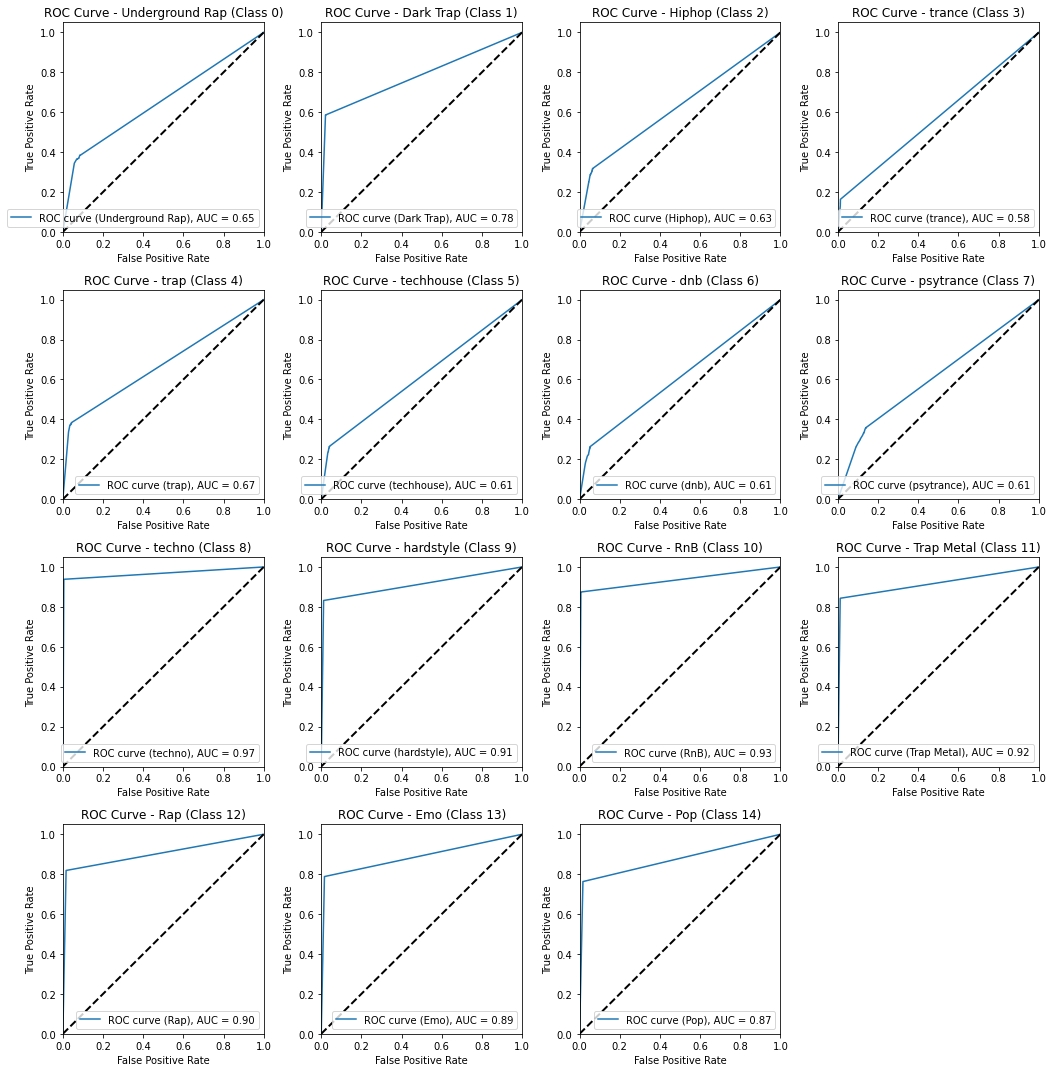

In [29]:
# Plotting the ROC curve for each class in separate subplots
plt.figure(figsize=(15, 15))
for i in range(num_classes):
    genre = result_df.loc[result_df['Class'] == i, 'Genre'].values[0]
    plt.subplot(4, 4, i+1)
    plt.plot(fpr[i], tpr[i], label=f'ROC curve ({genre}), AUC = {roc_auc[i]:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {genre} (Class {i})')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

This visualization aids in understanding the model's classification performance for different genres by observing how well the curves are separated from the diagonal reference line and the associated AUC scores. The wider the curve, the higher the AUC value. Let's get more precise AUC values to assist us in interpreting the curves.

First, we'll create a new array 'genres' containing unique genre labels extracted from the 'genre' column of the DataFrame df.

A new DataFrame auc_df is then created to store the AUC values for each class (genre). We use a list comprehension to iterate over the range of class indices and extract the corresponding AUC values from the roc_auc dictionary.

The DataFrame auc_df is sorted in ascending order based on the AUC values using the sort_values function. This allows us to identify which genres have the lowest AUC values, indicating potential areas where the model's performance might be weaker.

In [30]:
# Defining genres
genres = df['genre'].unique()

# Creating an empty DataFrame to store AUC values
auc_df = pd.DataFrame(columns=['Genre', 'AUC'])

Next, we loop through each class, extracting the corresponding genre name and the calculated AUC value from the roc_auc dictionary. We then append this information as a new row to the auc_df DataFrame. After calculating AUC values for all classes, we sort the DataFrame in ascending order based on AUC values using the sort_values() method, and print the sorted DataFrame:

In [31]:
# Calculating AUC values and adding them to the DataFrame
for i in range(num_classes):
    genre = result_df.loc[result_df['Class'] == i, 'Genre'].values[0]
    auc_value = roc_auc[i]
    auc_df = auc_df.append({'Genre': genre, 'AUC': auc_value}, ignore_index=True)

# Sorting the DataFrame by AUC values in ascending order
auc_df_sorted = auc_df.sort_values(by='AUC', ascending=True)

# Displaying the sorted DataFrame
print(auc_df_sorted)


              Genre       AUC
3            trance  0.575335
6               dnb  0.606359
7         psytrance  0.611636
5         techhouse  0.612450
2            Hiphop  0.627235
0   Underground Rap  0.652706
4              trap  0.672341
1         Dark Trap  0.782301
14              Pop  0.873130
13              Emo  0.886009
12              Rap  0.901276
9         hardstyle  0.910064
11       Trap Metal  0.916015
10              RnB  0.934043
8            techno  0.966686


<ipython-input-31-1e6266afee22>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  auc_df = auc_df.append({'Genre': genre, 'AUC': auc_value}, ignore_index=True)
<ipython-input-31-1e6266afee22>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  auc_df = auc_df.append({'Genre': genre, 'AUC': auc_value}, ignore_index=True)
<ipython-input-31-1e6266afee22>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  auc_df = auc_df.append({'Genre': genre, 'AUC': auc_value}, ignore_index=True)
<ipython-input-31-1e6266afee22>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  auc_df = auc_df.append({'Genre': genre, 'AUC': auc_value}, ignore_index=True)
<ipython

The above DataFrame shows us that as AUC values increase, the model's ability to distinguish between the positive class (the specific genre) and the negative class (other genres) improves.

**Lowest AUC Value (0.575):** The genre 'trance' exhibits the lowest AUC value, suggesting a moderate ability of the model to distinguish 'trance' songs from other genres.

**Mid-Level AUC Values (0.627 - 0.901):** Genres like 'Hiphop' (AUC: 0.627), 'Underground Rap' (AUC: 0.653), 'trap' (AUC: 0.672), 'Dark Trap' (AUC: 0.782), 'Pop' (AUC: 0.873), 'Emo' (AUC: 0.886), and 'Rap' (AUC: 0.901) showcase moderate to strong performance in classification, indicating the model's ability to effectively differentiate these genres from others.

**Highest AUC Value (0.967):** The genre 'techno' stands out with the highest AUC value, indicating exceptional performance in classifying 'techno' songs from other genres.

Our first model was a baseline model, tweaked to accomodate class distribution and weight. Now, we can move forward in our iterative process to further tune our Decision Tree.

### Model 2: Tuned Decision Tree

Hyperparameter tuning is a crucial step in machine learning model development as it helps find the best combination of hyperparameters that can lead to improved model performance. By tuning hyperparameters, we are fine-tuning the decision tree model, making it more effective in capturing the underlying patterns and relationships in the data, thereby improving its predictive capabilities on unseen data. 

Grid search is useful because it automates the process of finding the best hyperparameters, saving us from manually trying out different combinations. In a grid search, we create a "grid" of all possible combinations of hyperparameter values we want to explore. The algorithm then trains and evaluates the model with each combination of hyperparameters using a specified evaluation metric based on cross-validation.

In [32]:
# Importing necessary class
from sklearn.model_selection import GridSearchCV

We want to strike a balance between exploring a wide range of hyperparameter values and keeping the search manageable and efficient. Here, we'll narrow down the hyperparameter space with specific values, streamlining the search process and avoiding exhaustively evaluating every possible combination:

- param_grid is a Python dictionary that defines the hyperparameter values to be explored during the grid search.
- For the max_depth hyperparameter, the values [None, 10, 15] are specified. These values determine the maximum depth of the decision tree, controlling its complexity.
- The min_samples_split hyperparameter is given values [2, 5], which represent the minimum number of samples required to split an internal node.
- Similarly, the min_samples_leaf hyperparameter has values [1, 2], representing the minimum number of samples required to be at a leaf node.
- The criterion hyperparameter can take on two values: 'gini' or 'entropy'. This parameter specifies the criterion used to measure the quality of a split.

In [33]:
# Reducing hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 15],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],   
    'criterion': ['gini', 'entropy']
}

Now, we create an instance of the DecisionTreeClassifier as the base model. The random_state parameter ensures reproducibility of results. The GridSearchCV class is then initialized with the model, param_grid, a 5 fold cross-validation strategy, and scoring metric (accuracy). The grid search algorithm fits the model on the training data (X_train and y_train). It performs cross-validation to estimate the performance of each combination of hyperparameters and selects the best combination based on the accuracy:

In [34]:
# Performing grid search
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

Next, the best_params_ attribute of the GridSearchCV object stores the combination of hyperparameters that achieved the best performance based on the chosen scoring metric (accuracy). We then print the best hyperparameters that were determined by the grid search:

In [35]:
# Finding the best hyperparameters
best_params = grid_search.best_params_

# Printing best params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


Now, we create a new instance of the DecisionTreeClassifier class with the random_state set to ensure reproducibility and passes the best hyperparameters obtained from the grid search as keyword arguments. The fit method is used to train the model using the training data (X_train and y_train). After training, the model's predictions are generated using the test data (X_test):

In [36]:
# Creating a new Decision Tree model with the best hyperparameters
best_model = DecisionTreeClassifier(random_state=42, **best_params)

# Fitting the model to the training data and evaluating on the test data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [37]:
# Importing necessary metrics
from sklearn.metrics import accuracy_score, classification_report

Finally, the accuracy_score function is used to calculate prediction accuracy. It takes the true labels (y_test) and the predicted labels (y_pred) as input and computes the accuracy as the ratio of correctly predicted instances to the total number of instances. 

The classification_report function generates a comprehensive classification report, which includes metrics such as precision, recall, F1-score, and support for each class in the target variable. It takes the true labels (y_test) and predicted labels (y_pred) as input:

In [38]:
# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing accuracy score and classification report
print("Tuned Decision Tree Accuracy:", accuracy)
print("Classification Report:", report)

Tuned Decision Tree Accuracy: 0.6352676988535634
Classification Report:                  precision    recall  f1-score   support

      Dark Trap       0.52      0.36      0.43       970
            Emo       0.54      0.61      0.57       341
         Hiphop       0.44      0.43      0.44       621
            Pop       0.39      0.07      0.12        98
            Rap       0.88      0.28      0.42       341
            RnB       0.27      0.30      0.29       396
     Trap Metal       0.41      0.24      0.30       384
Underground Rap       0.42      0.64      0.51      1192
            dnb       0.95      0.95      0.95       599
      hardstyle       0.84      0.84      0.84       619
      psytrance       0.90      0.86      0.88       598
      techhouse       0.85      0.85      0.85       568
         techno       0.80      0.81      0.81       590
         trance       0.74      0.82      0.78       562
           trap       0.73      0.77      0.75       582

       accurac

We see that the model's accuracy has jumped from 0.57 (initial model) to 0.64. Nice! Let's get into the metric details:

**Robust Performance:** dnb, hardstyle, psytrance, techhouse, techno, trance

- High Precision and Recall: These genres demonstrate high precision and recall scores, indicating the model's ability to effectively predict instances of these genres.
- Distinctive Features: The unique musical characteristics and well-defined features of these electronic genres make them easier for the model to distinguish.
- Sufficient Data: There seems to be enough data available for these genres, enabling the model to learn their patterns accurately.

**Moderate Performance:** Emo, Hiphop, RnB, Underground Rap

- Balanced Precision and Recall: These genres show balanced precision and recall scores, suggesting that the model can predict instances of these genres reasonably well.
- Variability in Features: These genres can have a range of musical traits, leading to moderate performance due to the complexity of their features.

**Poor Performance:** Dark Trap, Pop, Rap, Trap Metal

- Low Recall and Precision: These genres have lower precision and recall scores, indicating the model's struggle to accurately predict instances of these genres.
- Feature Ambiguity or Similarity: The features that distinguish these genres might be ambiguous or similar to other genres, making it challenging for the model.


As we can see, the model's performance varies significantly across different genres. While it excels in some genres like "dnb," "hardstyle," and "psytrance," it struggles to accurately classify genres like "Pop," "Rap," and "Trap Metal." The macro and weighted average F1-scores provide insights into the overall model performance, with an accuracy of 64% suggesting ***moderate success in classifying music genres.***

Since we took the time to visualize the ROC curves for our initial model, we think it would be cool to visualize our tuned Decision Tree. Let's do it by importing plot_tree and setting max_depth to 1. This will allow us to plot just one level of our tree, which will let us see the root node (the initial decision based on a chosen feature) and the two child nodes resulting from that initial split.  It'll give us a nice picture of which features our model started its decision making process from:

In [39]:
# Importing plot_tree
from sklearn.tree import plot_tree

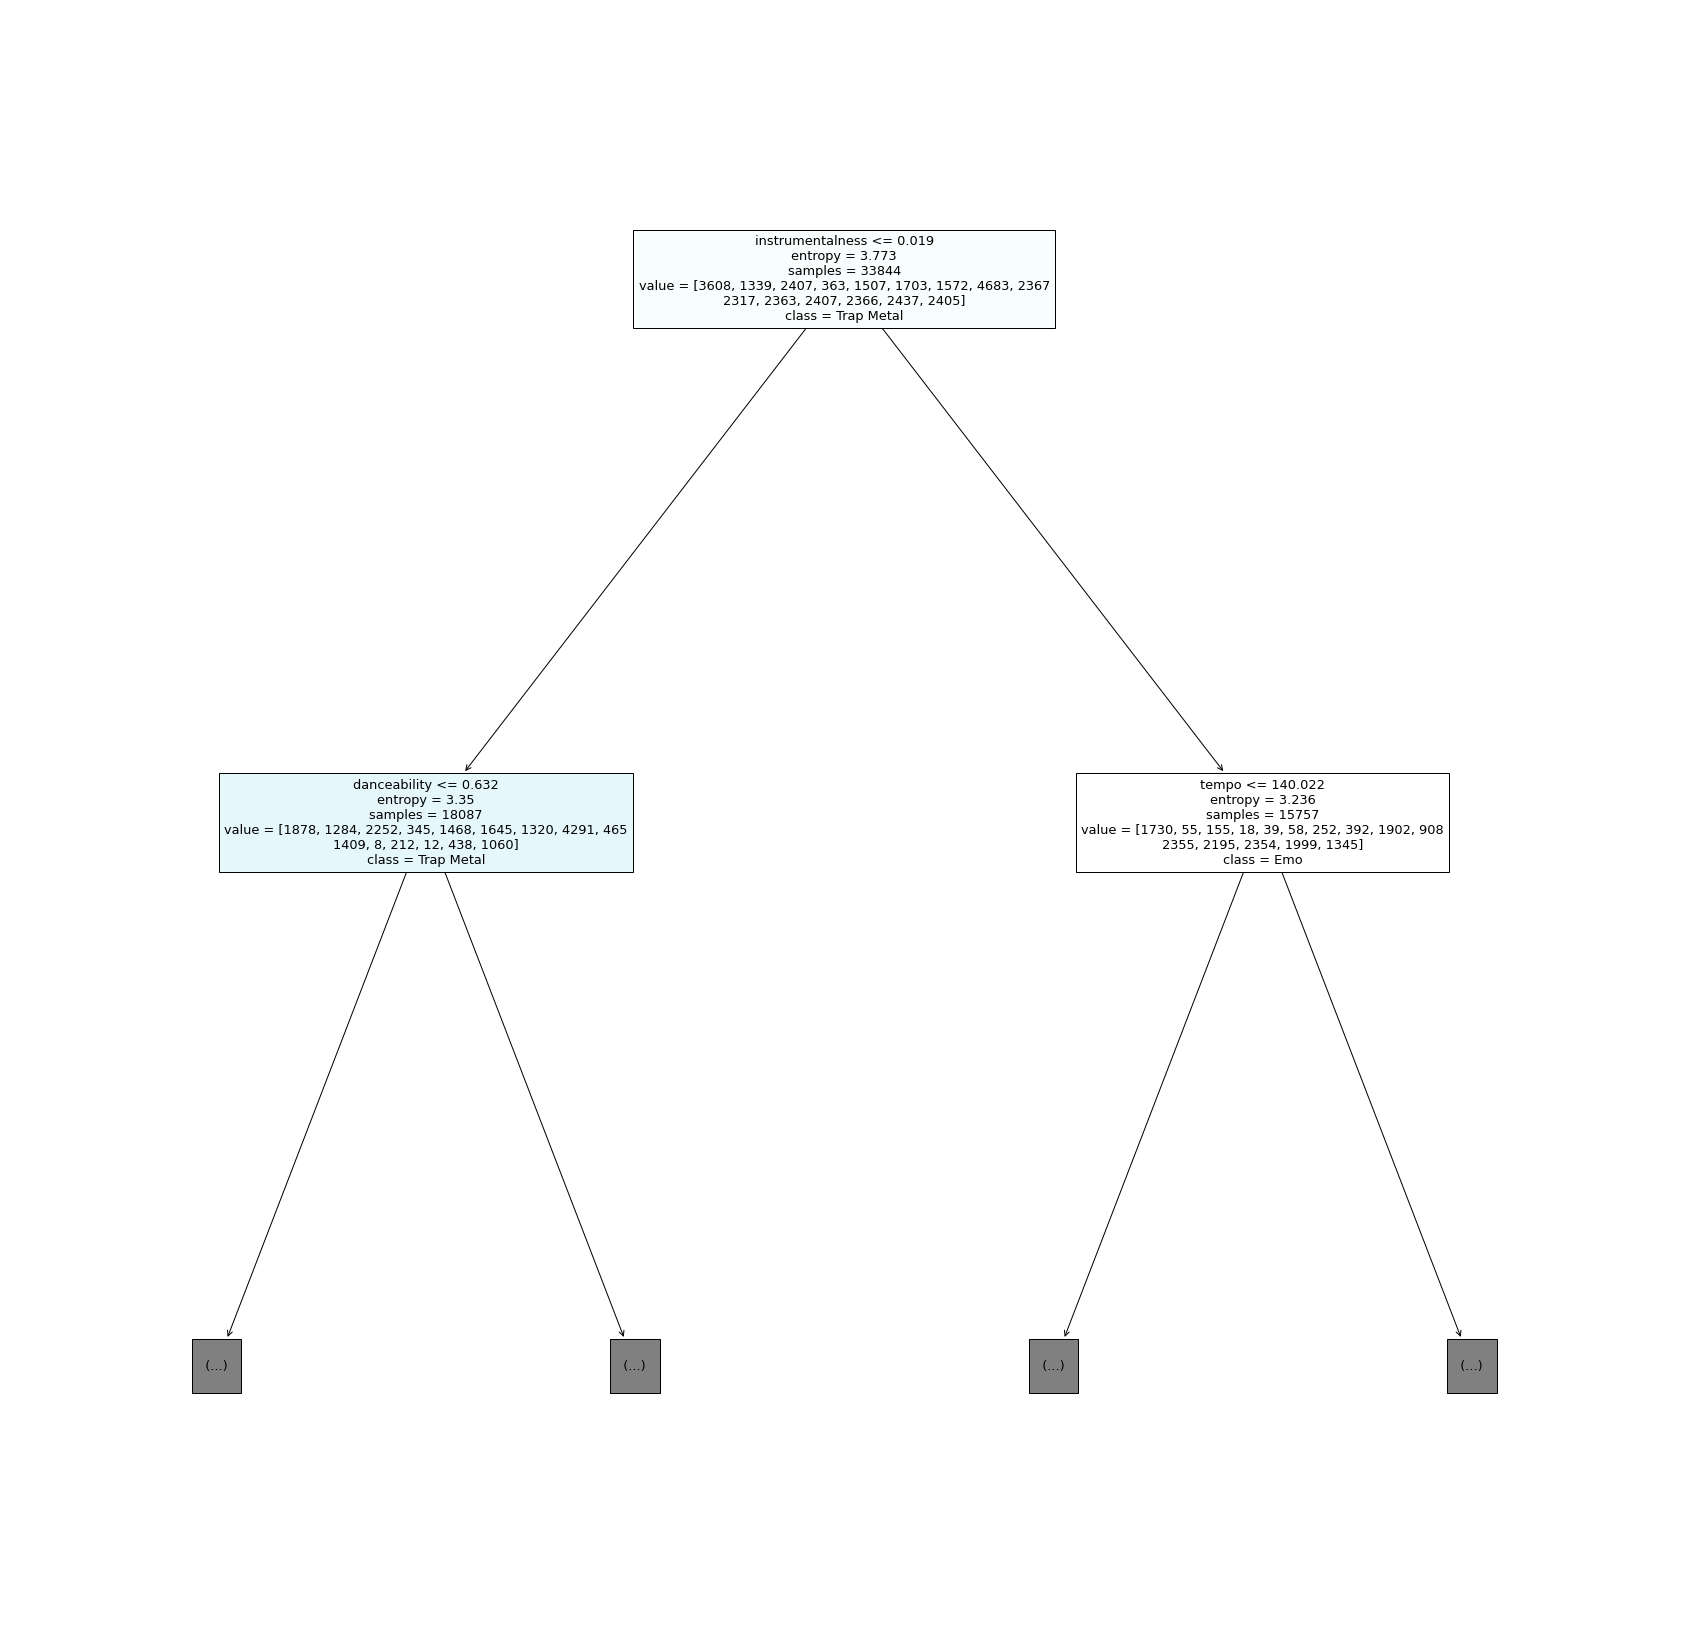

In [40]:
# Plotting just one level of tuned Decision Tree
plt.figure(figsize=(30, 30))
plot_tree(best_model, feature_names=X_train.columns, class_names=y_train.unique(), filled=True, max_depth=1)
plt.show()

Setting the max_depth any higher would result in a difficult-to-read decision tree and wouldn't give us much insight as to how our tree began. At least we can see the initial logic that our model employs to distinguish between classes. It's a way to peek into the "starting point" of our Decision Tree's decision-making process and understand which feature it considers most important for making the first separation.

The initial node in our Tuned Decision Tree visualization indicates that the first split is based on the feature "instrumentalness" with a threshold of 0.019. This means that the model is using the "instrumentalness" feature to decide how to separate instances into different classes. Instances with a value of "instrumentalness" less than or equal to 0.019 will follow one branch of the tree, while those with a value greater than 0.019 will follow another branch.

This initial split sets the foundation for the subsequent decisions made by the Decision Tree as it further divides the data into more refined subsets based on additional features and thresholds.

### Model 3: Random Forest

A Random Forest Classifier is a versatile ensemble learning algorithm that combines the predictive power of multiple decision trees to make accurate predictions. Each decision tree in the ensemble is constructed using a random subset of the training data and features, aiming to reduce overfitting and increase generalization. When making predictions, the final output is a result of aggregating the predictions from individual trees through majority voting.


In [41]:
# Importing necessary classes and functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

First, let's create an instance of the RandomForest classifier, specifying that the ensemnle should consist of 100 decition trees. The random_state parameter of 42 ensures reproducability of results:

In [42]:
# Creating an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

Next, we'll train the model on the training data (X_train and y_train) using the fit method. Each tree in the ensemble is constructed by considering a random subset of the data's features. The trained model can then be used to make predictions on the test data (X_test). The ensemble combines predictions from individual trees to determine the final predicted class labels:

In [43]:
# Training model to training data
rf_model.fit(X_train, y_train)

# Making predictions on test data
y_pred_rf = rf_model.predict(X_test)

Finally, the accuracy of the model's predictions is calculated using the accuracy_score function. A detailed classification report provides valuable evaluation metrics, which we previously explored in our first DT model: 

In [44]:
# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Printing accuracy and classification report
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6696607965961471
                 precision    recall  f1-score   support

      Dark Trap       0.54      0.45      0.49       970
            Emo       0.72      0.74      0.73       341
         Hiphop       0.42      0.39      0.41       621
            Pop       0.25      0.08      0.12        98
            Rap       0.48      0.32      0.39       341
            RnB       0.41      0.36      0.38       396
     Trap Metal       0.36      0.27      0.31       384
Underground Rap       0.39      0.53      0.45      1192
            dnb       0.96      0.98      0.97       599
      hardstyle       0.89      0.93      0.91       619
      psytrance       0.94      0.93      0.93       598
      techhouse       0.87      0.90      0.88       568
         techno       0.87      0.85      0.86       590
         trance       0.82      0.90      0.86       562
           trap       0.86      0.86      0.86       582

       accuracy                           0

Above, we see an improvement from ~0.63 in accuracy (tuned Decision Tree) to ~0.67 (Random Forest). Cool!

Since we took the time to visualize our first Decision Tree, it could be fun to set random tree indices and let the code pick random trees from our random forest.

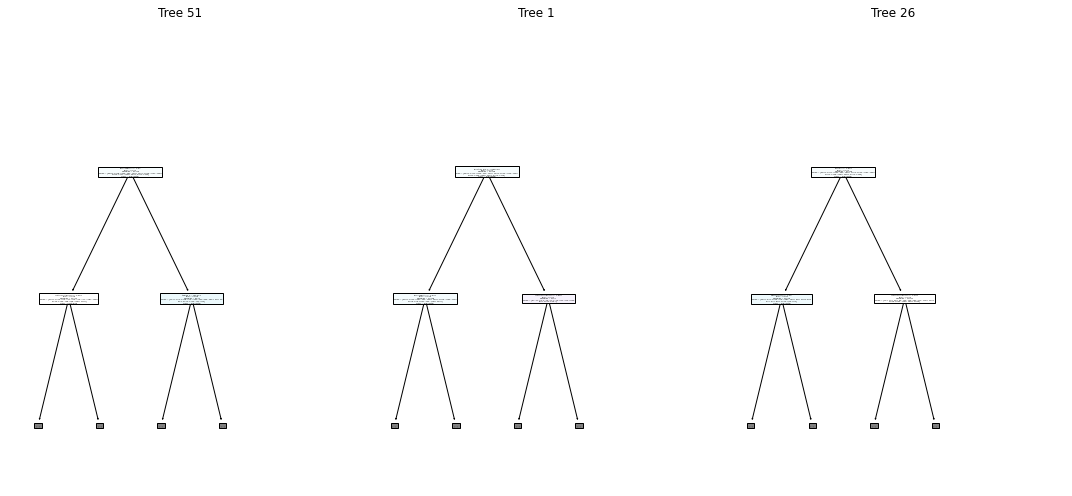

In [45]:
import random
# Set the number of trees you want to visualize
num_trees_to_visualize = 3  

# Generate random indices for the decision trees to visualize
random_tree_indices = random.sample(range(len(rf_model.estimators_)), num_trees_to_visualize)

# Visualize random decision trees in the Random Forest
plt.figure(figsize=(15, 7))
for i, tree_idx in enumerate(random_tree_indices):
    plt.subplot(1, num_trees_to_visualize, i+1)
    plot_tree(rf_model.estimators_[tree_idx], feature_names=X_train.columns, class_names=y_train.unique(), filled=True, max_depth=1)
    plt.title(f'Tree {tree_idx + 1}')
plt.tight_layout()
plt.show()

Soooo random XD!

Let's move on to our last model type: k-Nearest Neighbors (k-NN).

### Model 4: Baseline k-NN

We'll pivot to a completely different modeling technique to gain some clarity and keep our process diversified. 

The K-Nearest Neighbors (k-NN) algorithm is a simple yet powerful supervised learning method used for classification tasks. It operates on the principle that similar data points tend to belong to the same class. For a given data point, k-NN identifies the (k) nearest neighbors in the training dataset and predicts the class label by majority vote among these neighbors.

In [46]:
# Importing necessary class
from sklearn.neighbors import KNeighborsClassifier

A rule of thumb in Data Science says that the square root of the number of data points in the dataset is a good place to start when creating a baseline k-NN model. 

So, let's calculate the square root of the number of data points to help determine an appropriate starting value for the number of 'neighbors', denoted as 'k'. The choice of 'k' influences the balance between noise reduction and sensitivity to local variations:

In [47]:
# Calculating the square root of the number of data points in the dataset
n = df.shape[0]
sqrt_n = int(n ** 0.5)  # Calculate the square root of 'n'

# Printing number and sqrt
print("Number of data points:", n)
print("Square root of 'n':", sqrt_n)

Number of data points: 42305
Square root of 'n': 205


Now, we'll create and instance of the KNeighborsClassifier with the specified number of neighbors (n_neighbors) set to the sqrt of 'n': 205. Then, we can train the k-NN model on the training data (X_train and y_train) using the fit method:

In [48]:
# Creating an instance of KNeighborsClassifier
k = 205 
knn_model = KNeighborsClassifier(n_neighbors=k)

# Training the k-NN model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=205)

Next, we take our trained model to make predictions on the test data (X_test) and the class label is predicted by majority vote from the k nearest neighbors in the training dataset:

In [49]:
# Making predictions on test data
y_pred = knn_model.predict(X_test)

Finally, we can calculate the accuracy of the k-NN model's predictions using the accuracy_score function, followed by a printed classification report that provides insides into scoring metrics:

In [50]:
# Calculating model accuracy 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing accuracy and classification report
print("k-NN Accuracy:", accuracy)
print("Classification Report:", report)

k-NN Accuracy: 0.2691171256352677
Classification Report:                  precision    recall  f1-score   support

      Dark Trap       0.17      0.07      0.10       970
            Emo       0.11      0.01      0.03       341
         Hiphop       0.11      0.05      0.07       621
            Pop       0.00      0.00      0.00        98
            Rap       0.00      0.00      0.00       341
            RnB       0.13      0.01      0.01       396
     Trap Metal       0.39      0.02      0.03       384
Underground Rap       0.28      0.69      0.40      1192
            dnb       0.26      0.63      0.36       599
      hardstyle       0.15      0.08      0.10       619
      psytrance       0.59      0.64      0.61       598
      techhouse       0.20      0.06      0.09       568
         techno       0.35      0.49      0.41       590
         trance       0.13      0.04      0.06       562
           trap       0.16      0.32      0.21       582

       accuracy              

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the classification report and accuracy score, the k-Nearest Neighbors (k-NN) model is not performing well on our dataset. The overall accuracy is quite low at around 0.27, which means the model is not making accurate predictions on the majority of the data points.

The classification report also shows low precision, recall, and F1-score for most classes. For example, the F1-scores for many classes are close to 0, indicating that the model is struggling to correctly classify instances for those classes. The macro-avg F1-score of around 0.16 is also quite low, which suggests that the model is not performing well across all classes on average.

### Final Model: Tuned k-NN

One possible reason for poor performance in the k-NN model could be ***lack of feature scaling.*** the k-NN algorithm is sensitive to the scale of features, and if features are not properly scaled, it can lead to biased results. Let's tune our k-NN model to see if performance improves.

#### Standardization

To improve performance, we could try standardization (z-score normalization) to ensure features are scaled to a similar numerical range. Let's try StandardScaler and see what happens:

In [51]:
# Importing necessary class
from sklearn.preprocessing import StandardScaler

First, we'll create an instance of the StandardScaler class by initializing the scaler object. This object will be used to perform the scaling process on our data.

We then employ the fit_transform method of the scaler object on the training data (X_train). This method computes the mean and standard deviation of each feature in the training data and then scales the features to have a mean of 0 and a standard deviation of 1. The scaled training data is stored in the variable X_train_scaled.

After scaling the training data, we use the transform method of the scaler object to apply the same scaling to the test data (X_test). The scaled test data is stored in the variable X_test_scaled:

In [52]:
# Scaling features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Optimal n_neighbors

Now, we can further tune our k-NN model by finding the ***optimal n_neighbors value***. Earlier, we simply took the sqrt of our total number of data points and set it as 'k'. To further tune our model, we can use a function to find a good value of k. Using accuracy as the evaluation metric, the goal is to determine the number of neighbors that provides the best accuracy on the test set.

First, we define the function and specify arguments: 

- X_train_scaled, y_train: Scaled training data and corresponding labels.
- X_test_scaled, y_test: Scaled test data and corresponding labels.
- min_k (default is 1): The minimum value of neighbors (odd number).
- max_k (default is 25): The maximum value of neighbors (odd number).


We then initialize best_k and best_accuracy to None and 0.0 respectively. These variables will store the best value of n_neighbors and the corresponding best accuracy.

Next, we'll iterate Over K Values. A for loop iterates through odd numbers from min_k to max_k + 1. These odd numbers represent potential values of n_neighbors for the k-NN model.

- Inside the loop, a k-NN classifier is created with the current value of k as the number of neighbors.
- The classifier is then fitted to the scaled training data and corresponding labels.
- Predictions are made on the scaled test data.
- The accuracy of the predictions is calculated using the accuracy_score function.

The calculated accuracy can then be compared to best_accuracy. If the accuracy is **higher** than the current best_accuracy, the values of best_accuracy and best_k are updated with the current accuracy and k value. 

After iterating through all potential k values, we can print the best value of n_neighbors (best_k) and the corresponding best accuracy (best_accuracy).:

In [53]:
# Defining function and specifying arguments
def find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, min_k=1, max_k=25):
    best_k = None
    best_accuracy = 0.0
    
    # Creating a for loop to iterate over odd numbers from min_k to max_k + 1.
    for k in range(min_k, max_k + 1, 2):
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_scaled, y_train)
        
        # Making predictions on scaled test data
        y_pred = knn_classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Comparing and updating
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            
    print("Best value of K:", best_k)
    print("Best Accuracy:", best_accuracy)

# Call the function with your data and desired range for K
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, min_k=1, max_k=25)


Best value of K: 17
Best Accuracy: 0.6000472757357287


We see that the optimal n_neighbors is 17, at which point the model would supposedly be performing at peak accuracy (around 0.60), assuming it doesn't rise or fall significantly with each increase of 'k'. Let's plot an elbow curve to see if this is accurate to our dataset.

To do this, we begin by setting a range of n_neighbors values between 1 and some odd number above 17. 35 seems legit: 

In [54]:
# Creating lists to store values
n_neighbors_values = range(1, 35)  # Try different values of n_neighbors
accuracy_scores = []

Next, we iterate over a list of n_neighbors values (defined as n_neighbors_values). For each value of n_neighbors, we create a k-nearest neighbors (k-NN) model using KNeighborsClassifier from scikit-learn. We subsequently train the model on the scaled features of the training set using the fit method. 

After training, we use the trained model to make predictions on the scaled test set using the predict method. We calculate the accuracy score of the model's predictions on the test set using the accuracy_score function and then append this accuracy score to the list accuracy_scores.

This loop basically evaluates the performance of the k-NN model with different values of n_neighbors and stores the accuracy scores in the accuracy_scores list for further analysis or visualization:

In [55]:
# Iterate over different n_neighbors values
for n_neighbors in n_neighbors_values:
    
    # Creating the k-nearest neighbors model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Training the model on the scaled features
    knn.fit(X_train_scaled, y_train)
    
    # Making predictions on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Calculating accuracy score on the scaled test set
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)

Now for the fun part: visualizing the relationship between our model's accuracy scores and number of neighbors (k): 

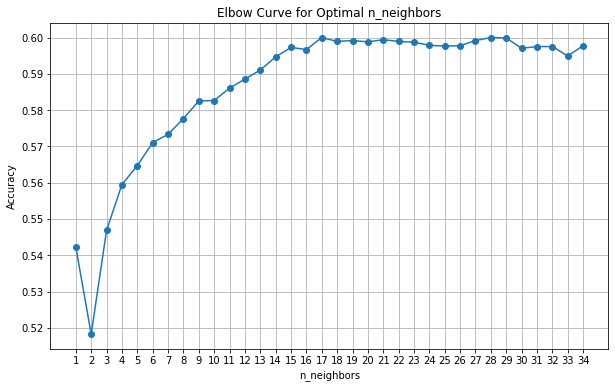

In [56]:
# Plotting the accuracy scores against n_neighbors values
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.title("Elbow Curve for Optimal n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.xticks(n_neighbors_values)
plt.grid(True)
plt.show()

The above plot is an elbow curve depicting the relationship between the model's accuracy at different n_neighbor(s). 

At the beginning, with a small number of neighbors, the model's accuracy is relatively low. This could be because the model is making overly simplistic decisions based on just a few neighbors.

Our accuracy then jumps down just below 0.52, at 2 neighbors. As we increase the number of neighbors, the accuracy drops. This could be due to the model becoming too complex and sensitive to noise in the data. It might start overfitting by considering too many neighbors, leading to less generalization.

Then we see accuracy jump up to about 0.55. After the initial drop, the accuracy improves slightly at 3 neighbors, and this could indicate that the model is finding a better balance between complexity and generalization.

We notice accuracy steadily rising with each increasing neighbor until plateauing at around 0.60. This plateauing suggests that the model has reached a point where adding more neighbors doesn't significantly improve accuracy. The optimal value of n_neighbors is likely around this plateau (~17), where the model performs well without overfitting.

So, it looks like our original function to find best_k matches our method of visualizing the model's plateau point.

# Conclusion

To kickstart BeatWave's genre classification methods, we've embarked upon many different modeling iterations: a decision tree, a tuned decision tree, a random forest, a k-NN AND a tuned k-NN. That's a lot of models, and with tuning and tweaking, they all performed moderately well.

Our most accurate and robust model seems to be our Random Forest model, with an accuracy of ~ 0.67. With some more pruning and hyperperameter tuning, we think this model has the potential to perform the best out of all modeling approaches explored in this 


### Limitations of the Data

It's worth noting that our dataset is inherently limited in its scope. It is heavily imbalanced and, for a streaming platform like BeatWave, we're likely to want to delve deeper into a larger dataset. The fact remains that our dataset is only at around 42,000 data points, which is pretty low considering how much electronic music exists in the world. We're also limited by the number of features (11-12 notable features). To get more accurate and robust classification models...

### ... Consider Next Steps:

- Find or compile a ***much larger dataset,*** ensuring that majority of datapoints contain data for all features to avoid class imbalances.

- Invest in ***feature engineering:***
    - Aggregating Features: You can calculate aggregate statistics (e.g., mean, median, variance) over different segments of a song to capture more nuanced characteristics. For example, you could calculate energy changes over different parts of the song.
    - Feature Interaction: Create new features by combining existing ones. For instance, you could multiply 'energy' and 'loudness' to capture the energetic loudness of a song.
    - Temporal Patterns: Explore the temporal patterns of features. For example, you could create features that represent the rate of change of features over time intervals.
    - Harmonic and Melodic Features: Extract features related to the harmonic and melodic aspects of music, such as chord progressions, melody patterns, and tonal intervals.
    - Domain-Specific Features: Create features specific to the domain of music, such as genre-specific features or music theory-based features.
    - Data Transformation: Apply mathematical transformations to the features, such as logarithmic scaling, to amplify certain aspects of the data. 